In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

import utils

%matplotlib inline

In [2]:
if 'db' in os.listdir():
    print('Dataset ready.')
else:
    print('Building dataset: approx. 5 minutes')
    utils.populate_db_folder()

print('Loading into memory. It will take a few seconds.')
df = pd.read_csv('db\dataset.csv', parse_dates=True)

Dataset ready.
Loading into memory. It will take a few seconds.


### All listings csv for  "Paris, Île-de-France, France"
Clean dataframe

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)  

# Remove neighbourhood_group column, since it is all nan
df.drop('neighbourhood_group', axis=1, inplace=True)  

# Exclude all year closed apartments and also corrupted data
df = df.loc[(df.availability_365 != 0) & (df.availability_365 <= 365)]

In [21]:
# Convert period data
# df['period'] = df['period'].apply(lambda x: pd.to_datetime(x)) 
# df['year'] = df['period'].apply(lambda x: x.year) 
# df['month'] = df['period'].apply(lambda x: x.month) 
# df['day'] = df['period'].apply(lambda x: x.day) 

df['year'] = df['period'].apply(lambda x: x[:4]) 

# Remove not full year data
df = df[df.year != 2020]

In [6]:
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,period,year,month,day
0,4830108,2 pièces à Paris,24865552,Domitille,Vaugirard,48.833827,2.294424,Entire home/apt,95,1,0,NaN,NaN,1,118.0,2015-05-06,2015,5-,
1,69868,Champs Elysees / Louvre - StHo A6,57775,Sylvain☆☆☆,Louvre,48.865222,2.333597,Entire home/apt,165,2,4,2012-09-07,0.1,10,365.0,2015-05-06,2015,5-,


Unique hosts YTD comparison

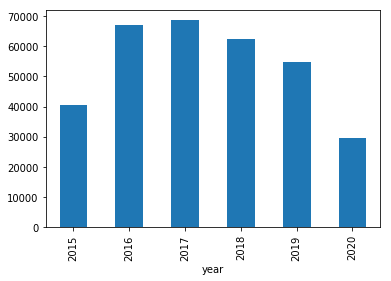

In [7]:
df.groupby('year').nunique()['host_id'].plot(kind='bar')

__Hotel room__ as novel option of room type is introduced in 2019, means airbnb aims for booking's market

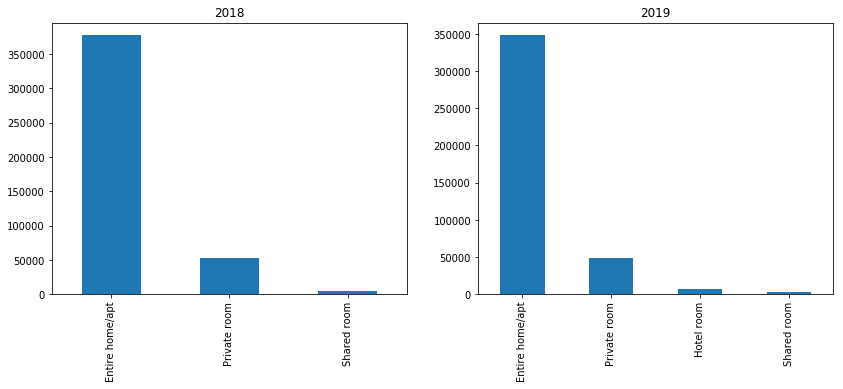

In [9]:
fig, ([ax1,ax2]) = plt.subplots(ncols=2, figsize=(14,5))

ax1.set_title('2018')
ax2.set_title('2019')

df.loc[df.year == '2018', 'room_type'].value_counts().plot(kind='bar', ax=ax1)
df.loc[df.year == '2019', 'room_type'].value_counts().plot(kind='bar', ax=ax2)

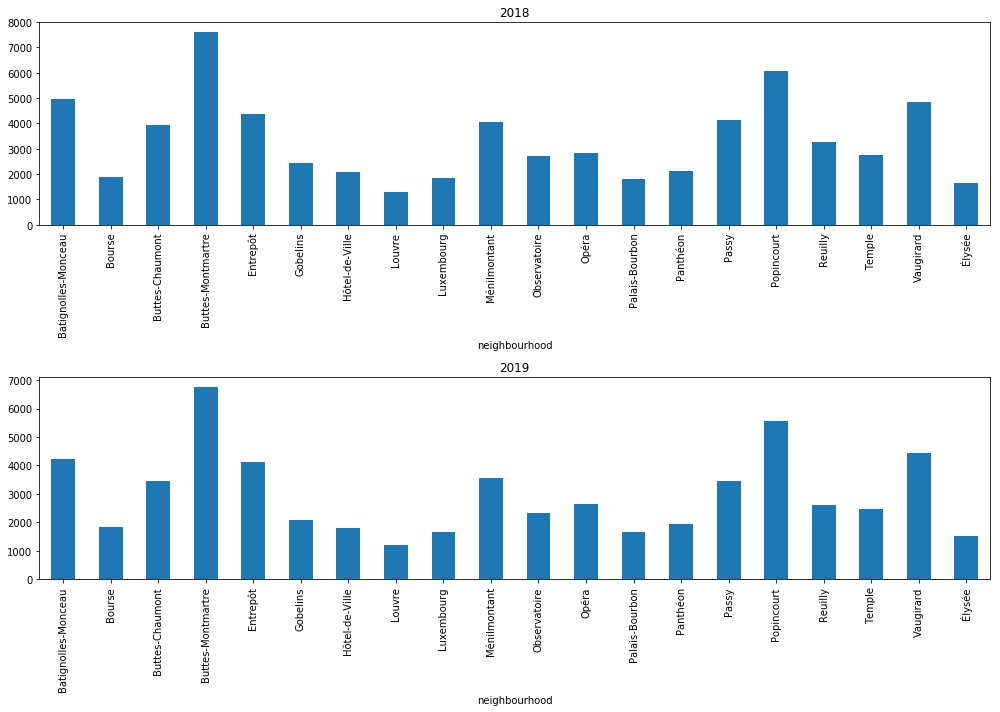

In [11]:
fig, ([ax1,ax2]) = plt.subplots(nrows=2, figsize=(14,10))

ax1.set_title('2018')
ax2.set_title('2019')

df.loc[df.year == '2018', :].groupby('neighbourhood').nunique()['host_id'].plot(kind='bar', ax=ax1)
df.loc[df.year == '2019', :].groupby('neighbourhood').nunique()['host_id'].plot(kind='bar', ax=ax2)
plt.tight_layout()

In [12]:
import ipywidgets as widgets

In [16]:
w1 = widgets.IntSlider(
    value=next(iter(df.year.unique())),
    min=df.year.unique().min(),
    max=df.year.unique().max(),
    step=1,
    description='Select year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
);w1

IntSlider(value=2015, continuous_update=False, description='Select year:', max=2020, min=2015)

Refresh cell below

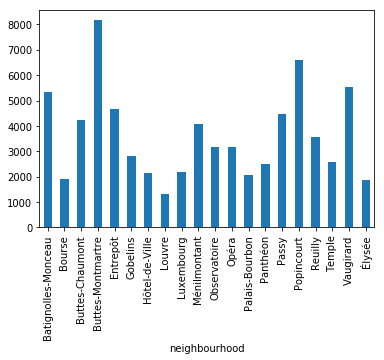

In [20]:
df.loc[df.year == str(w1.value), :].groupby('neighbourhood').nunique()['host_id'].plot(kind='bar')